# 1. Minimização

Pretende-se minimizar a seguinte função:

$$ y = f(x) = (x-2)^2+x^4 $$

**Pesquisa unidimensional**
- Método dos terços
- Secção Aurea
- Método da interpolação quadrática

**Pesquisa multidimensional**
- Método de Powell
- Método do gradiente
- Método da quadrática

## Calcular minimo de uma função utilizando um guess

-> start com guess

1. pesquisa para enquadrar num intervalo
    - (esq. ou dir.)
    - passo constante ou variavel  
2. redução intervalar
    - terços
    - secção aurea  
3. ajuste da quádrica

In [1]:
def function1(x):
    return (x-2)**2+x**4

In [2]:
def sequentialSearch(x0,func,h=1):
    a = x0
    b = a + h
    while func(a) > func(b):
        a += h
        b += h
    return [a,b]

int = sequentialSearch(0,function1,0.01)
print(int)

[0.8400000000000005, 0.8500000000000005]


Ficamos a saber que o minimo está entre 0.84 e 0.85

Passando agora à redução intervalar utilizando os dois métodos:

In [3]:
# Método dos Terços

def tercos(interval, f, prec = 0.0001):
    a = interval[0]
    b = interval[1]
    while abs(b-a) > prec:
        c = a + (b-a)/3.0
        d = b - (b-a)/3.0
        if f(c) < f(d):
            b = d
        else:
            a = c
    return [a,b]


# Método da secção aurea
from math import sqrt

def aureaSec(rangeVal, f, prec=0.1):
    # B = proporção
    B = (sqrt(5) - 1) / 2

    a = rangeVal[0]
    b = rangeVal[1]

    c = a + (b - a) * B
    d = b - (b - a) * B

    fc = f(c)
    fd = f(d)

    while abs(b - a) > prec:
        if fc < fd:
            b = d
            d = c
            fd = fc
            c = a + B * (b - a)
            fc = f(c)
        else:
            a = c
            c = d
            fc = fd
            d = b - B * (b - a)
            fd = f(d)

    return [a, b]

int_ter = tercos(int,function1,0.01)
int_sa = aureaSec(int,function1,0.01)

print("Intervalo com terços (prec = 0.01):",int_ter)
print("Intervalo com s.aurea (prec = 0.01):",int_sa)

Intervalo com terços (prec = 0.01): [0.8400000000000005, 0.8466666666666672]
Intervalo com s.aurea (prec = 0.01): [0.8461803398874995, 0.8500000000000005]


Agora façamos um ajuste da quadrática para obter o minimo

In [4]:
def quadAdjust(points, f):
    x1 = points[0]
    x3 = points[1]
    x2 = (x1 + x3) / 2.0

    h = x2 - x1

    return x2 - (h * (f(x1) - f(x3))) / (2 * (f(x1) - 2 * f(x2) + f(x3)))

min_ter = quadAdjust(int_ter, function1)
min_sa = quadAdjust(int_sa, function1)

print("Min (terços):",min_ter)
print("Min (s.aurea):",min_sa)

Min (terços): 0.8514833018671916
Min (s.aurea): 0.8608989841010513


# 2. Integração

O comprimento L do arco de uma curva de equação $ y = f(x) $ entre as abcissas $x=a$ e $x=b$ é dado por 

$$ L = \int_{a}^{b} \sqrt{1+(y')^2} dx $$

Pretende-se determinar o comprimento da curva $ y=e^{kx}$ ente $ x = a $ e $x = b$, recorrendo aos métodos de **Simpson** e dos **Trapézios**.

Partindo dos seguintes dados:
$$ k = 2.5 $$
$$ a = 0 $$
$$ b = 1 $$
$$ h = 0.125 $$

Antes de mais, devemos calcular a derivada, $ (e^{kx})' = ke^{x} $, portanto:

In [1]:
from math import sqrt, exp

def func(x):
    return sqrt(1+(2.5*exp(x*2.5))**2)

In [2]:
def trapRule(x0,x1,f,h=0.125):
    N = int((x1-x0)/h)
    x = x0 + h
    res = 0
    for i in range(N-1):
        res += f(x)
        x += h
    return h*(f(x0)+f(x1)+2*res)/2


def simpsonRule(x0,x1,f,h=0.125):
    res = 0
    N = int((x1-x0)/h)
    x = x0 +h
    for i in range(1,N):
        if i % 2 == 0:
            res += 2*f(x)
        else:
            res += 4*f(x)
        x += h
    
    return h*(f(x0)+f(x1)+res)/3

trap = trapRule(0,1,func)
simp = simpsonRule(0,1,func)

print("Trap:",trap)
print("Simp:",simp)

Trap: 11.346293007012978
Simp: 11.255495338328446


In [3]:
def qc(x0,x1,f,h,method):
    s = method(x0,x1,f,h)
    s1 = method(x0,x1,f,h/2)
    s2 = method(x0,x1,f,h/4)
    
    print("Method:",method.__name__)
    print("h=%.05f: %.05f" % (h,s))
    print("h=%.05f: %.05f" % (h/2,s1))
    print("h=%.05f: %.05f" % (h/4,s2))
    
    conv = (s1 - s) / (s2 - s1)
    order = round(sqrt(conv))
    error = (s2-s1)/(order**2 - 1)
    print("QC:",conv)
    print("Order:",order)
    print("Rel. Error: %0.05f\n" % error)
    
qc(0,1,func,0.125,trapRule)
qc(0,1,func,0.125,simpsonRule)
    

Method: trapRule
h=0.12500: 11.34629
h=0.06250: 11.27778
h=0.03125: 11.26063
QC: 3.993940275742375
Order: 2
Rel. Error: -0.00572

Method: simpsonRule
h=0.12500: 11.25550
h=0.06250: 11.25495
h=0.03125: 11.25491
QC: 15.85798041454486
Order: 4
Rel. Error: -0.00000



# 3. Zeros de Funções Reais

Pretendemos resolver a seguinte equação numericamente:

$$ e^{x} - x - 5 = 0 $$

Com as seguintes formulas de recorrencia para Picard-Peano:

$$ (1) x_{n+1} = e^{x_n}-5 \\ (2) x_{n+1} = ln(5+x_n) $$

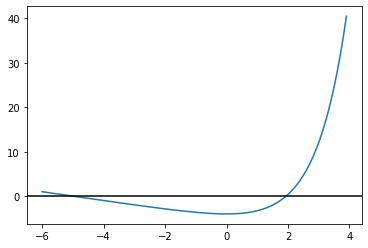

In [5]:
import matplotlib.pyplot as plt
from math import log, exp
from numpy import arange

def func3(x):
    return exp(x)-x-5

x_list = [i for i in arange(-6,4,0.1)]
y_list = [func3(i) for i in arange(-6,4,0.1)]

plt.plot(x_list,y_list)
plt.axhline(0, color='black')

Como podemos ver com o gráfico, a função tem 2 zeros, um no intervalo $[-6,-4]$ e outro no intervalo $[1,3]$.

A primeira formula de recorrencia vai dar-nos a raiz negativa, uma vez que a derivada nesse intervalo é inferior a 1. Pela mesma razão a segunda formula vai dar-nos a raiz positiva.

## Picard-Peano

Podemos utilizar a precisão absoluta como critério de paragem, sendo assim, a formula é sempre a mesma.

Para calcular a maior raiz:

In [6]:
def rec1Func3(x):
    return exp(x) - 5

def rec2Func3(x):
    return log(5+x)


def picardPeano(guess, rec, iterations=10):
    # print("Iteration 0: %.05f" % guess)
    res = [guess]
    for i in range(1,iterations):
        guess = rec(guess)
        # print("Iteration %d: %.05f" % (i,guess))
        res.append(guess)
        
    return res

In [7]:
def diffFunc3(x):
    return exp(x)-1

def newton(guess,func,diff,iterations=10):
    # print("Iteration 0: %.05f" % guess)
    res = [guess]
    for i in range(1,iterations):
        guess -= func(guess)/diff(guess)
        # print("Iteration %d: %.05f" % (i,guess))
        res.append(guess)
        
    return res

ppeano = picardPeano(3,rec2Func3)
newt = newton(3,func3,diffFunc3)

print("Picard-Peano\tNewton")
print("-----------------------")
for i,c in enumerate(ppeano):
    print("   Iteration",i)
    print("%.05f        %.05f" % (c, newt[i]))
    

Picard-Peano	Newton
-----------------------
   Iteration 0
3.00000        3.00000
   Iteration 1
2.07944        2.36677
   Iteration 2
1.95720        2.02566
   Iteration 3
1.93978        1.94126
   Iteration 4
1.93727        1.93686
   Iteration 5
1.93691        1.93685
   Iteration 6
1.93686        1.93685
   Iteration 7
1.93685        1.93685
   Iteration 8
1.93685        1.93685
   Iteration 9
1.93685        1.93685


Podemos verificar que o método de Newton convergeu logo na 4ª iteração enquanto que o método de Picard-Peano só converge a partir da 6ª iteração.

# 4. Sistemas de Eq. Diferenciais

$\frac{dC}{dt} = -e^{\frac{-0.5}{T+273}} * C $  
$\frac{dT}{dt} = 30e^{\frac{-0.5}{T+273}}*C -0.5*(T-20) $

$ t = 0 $  
$ C = 2.5 $  
$ T = 25 $

In [8]:
from math import exp

def dC(t,C,T):
    return -exp(-0.5/(T+273))*C

def dT(t,C,T):
    return 30*exp(-0.5/(T+273))*C - 0.5*(T-20)

def euler(deltaX, x, y, z, xf, dy, dz,info=True):
    if info == True:    
        print("Iteration 0")
        print("x: %.05f" % x)
        print("y: %.05f" % y)
        print("z: %.05f" % z)
    i = 1
    while x < xf:
        x += deltaX
        deltaY = dy(x, y, z)
        deltaZ = dz(x, y, z)
        y += deltaY * deltaX
        z += deltaZ * deltaX
        
        if info:
            print("Iteration", i)
            print("x: %.05f" % x)
            print("y: %.05f" % y)
            print("z: %.05f" % z)
        i += 1
        
    return y, z

def runga_kutta_4(deltaX, x, y, z, xf, dy, dz, info=True):
        
    if info:
        print("Iteration 0")
        print("x: %.05f" % x)
        print("y: %.05f" % y)
        print("z: %.05f" % z)
    i = 1
    while x < xf:
        x += deltaX
        dY1 = dy(x, y, z) * deltaX
        dZ1 = dz(x, y, z) * deltaX
        dY2 = deltaX * dy(x + deltaX / 2, y + dY1 / 2, z + dZ1 / 2)
        dZ2 = deltaX * dz(x + deltaX / 2, y + dY1 / 2, z + dZ1 / 2)
        dY3 = deltaX * dy(x + deltaX / 2, y + dY2 / 2, z + dZ2 / 2)
        dZ3 = deltaX * dz(x + deltaX / 2, y + dY2 / 2, z + dZ2 / 2)
        dY4 = deltaX * dy(x + deltaX, y + dY3, z + dZ3)
        dZ4 = deltaX * dz(x + deltaX, y + dY3, z + dZ3)
        y += (dY1 / 6 + dY2 / 3 + dY3 / 3 + dY4 / 6)
        z += (dZ1 / 6 + dZ2 / 3 + dZ3 / 3 + dZ4 / 6)
        
        if info:
            print("Iteration", i)
            print("x: %.05f" % x)
            print("y: %.05f" % y)
            print("z: %.05f" % z)
        i += 1
    
    return y, z


def convergence_quotient(deltaX, x, y, z, xf, dy, dz, method,info=False):
    print(method.__name__)
    y0, z0 = method(deltaX, x, y, z, xf, dy, dz, info)
    print("h: %.05f" % deltaX)
    print("y: %.05f" % y0)
    print("z: %.05f" % z0)
    y1, z1 = method(deltaX / 2, x, y, z, xf, dy, dz, info)
    print("\nh: %.05f" % (deltaX / 2))
    print("y: %.05f" % y1)
    print("z: %.05f" % z1)
    y2, z2 = method(deltaX / 4, x, y, z, xf, dy, dz, info)
    print("\nh: %.05f" % (deltaX / 4))
    print("y: %.05f" % y2)
    print("z: %.05f" % z2)

    quotient_y = (y1 - y0) / (y2 - y1)
    quotient_z = (z1 - z0) / (z2 - z1)

    error_y = (y2 - y1) / (round(quotient_y) - 1)
    error_z = (z2 - z1) / (round(quotient_z) - 1)

    print("\nCQ(y): %.05f" % quotient_y)
    print("Error(y): %.05f" % error_y)

    print("CQ(z): %.05f" % quotient_z)
    print("Error(z): %.05f" % error_z)

    return quotient_y, quotient_z



print("Primeira alinea")
euler(0.25,0,2.5,25,0.5,dC,dT)
print("\nSegunda Alinea")
runga_kutta_4(0.25,0,2.5,25,0.5,dC,dT)

print("\nTerceira Alinea")
convergence_quotient(0.25,0,2.5,25,0.5,dC,dT,euler)

Primeira alinea
Iteration 0
x: 0.00000
y: 2.50000
z: 25.00000
Iteration 1
x: 0.25000
y: 1.87605
z: 43.09357
Iteration 2
x: 0.50000
y: 1.40778
z: 54.25499

Segunda Alinea
Iteration 0
x: 0.00000
y: 2.50000
z: 25.00000
Iteration 1
x: 0.25000
y: 1.94782
z: 39.94349
Iteration 2
x: 0.50000
y: 1.51757
z: 49.70136

Terceira Alinea
euler
h: 0.25000
y: 1.40778
z: 54.25499

h: 0.12500
y: 1.46681
z: 51.77067

h: 0.06250
y: 1.49308
z: 50.69205

CQ(y): 2.24679
Error(y): 0.02627
CQ(z): 2.30325
Error(z): -1.07861


(2.2467937763495875, 2.303254685890371)

# 5. Otimização Multidimensional

$$ w(x,y) = -1.1xy+12y+7x^2 -8x $$

$ x_0 = 3 $  
$ y_0 = 1 $  
$ \lambda = 0.1$

Usando o método do gradiente

In [13]:
def function5(x,y):
    return -1.1*x*y+12*y+7*x**2-8*x

def diffFunction5x(x,y):
    return -1.1*y+14*x-8

def diffFunction5y(x,y):
    return -1.1*x+12


def gradient(x0, y0, h0, f, dfx, dfy, N=20, info=True):
    x = x0
    y = y0
    h = h0

    x_list = [x]
    y_list = [y]

    if info:
        print("iteration 0")
        print("x: %.05f" % x)
        print("y: %.05f" % y)
        print("f(x,y): %.05f" % f(x, y))
        print("gradient-x: %.05f" % dfx(x,y))
        print("gradient-y: %.05f" % dfy(x,y))
        print()

    for i in range(1, N + 1):
        xn = x - dfx(x, y) * h
        yn = y - dfy(x, y) * h

        if f(xn, yn) < f(x, y):
            h *= 2
            x = xn
            y = yn
            x_list.append(x)
            y_list.append(y)
            if info:
                print("iteration",i)
                print("x: %.05f" % x)
                print("y: %.05f" % y)
                print("f(x,y): %.05f" % f(x, y))
                print("gradient-x: %.05f" % dfx(x,y))
                print("gradient-y: %.05f" % dfy(x,y))
                print()
        else:
            h /= 2

    return x, y


gradient(3,1,0.1,function5,diffFunction5x,diffFunction5y,N=1)

iteration 0
x: 3.00000
y: 1.00000
f(x,y): 47.70000
gradient-x: 32.90000
gradient-y: 8.70000

iteration 1
x: -0.29000
y: 0.13000
f(x,y): 4.51017
gradient-x: -12.20300
gradient-y: 12.31900



(-0.29000000000000004, 0.13)

Logo a resposta seria $w(x,y) = 4.51017 $